# 1. Important Notation

## Summation

$1+2+3+4+5 = {\displaystyle \sum_{i=1}^5 i}$

Example: The sample mean.  Suppose I have a sample of data, $(x_1, x_2, ..., x_N)$.  

The sample mean is ${\displaystyle \frac{1}{N} \sum_{i=1}^N x_i}$, which may be denoted as $\overline x$.  

In [1]:
import numpy as np
from numpy import random
die = random.random_integers(1, 6, 10)
print die

[4 6 2 1 2 5 6 2 4 3]


In [2]:
print die.mean()

3.5


## Multiplication

$1\cdot2\cdot3\cdot4\cdot5 = {\displaystyle \prod_{i=1}^5 i}$

Example: Independently and identically distributed events and their joint likelihood.

$P(X_1 = x_1, X_2 = x_2, ..., X_N=x_N) = {\displaystyle \prod_{i=1}^N P(X_i = x_i)}$

# 2. Elements of Linear Algebra

Linear algebra makes life easy because it allows us to express linear systems with compact notation.  It can also be used to evaluate the dynamical properties of a system.  While the course does not emphasis theory, it may be convenient to use linear algebra to relay certain concepts quickly.

### A Matrix

An $(m \times n)$ matrix is an array of numbers ordered into $m$ rows and $n$ columns.

${\displaystyle A = \begin{bmatrix}
a_{11} & a_{12} & ... & a_{1n} \\
a_{21} & a_{22} & ... & a_{2n} \\
... & ... & ... & ... \\
a_{m1} & a_{m2} & ... & a_{mn} 
\end{bmatrix}}$

If $m=1$, then A is row vector with dimension $1 \times n$.  

If $n=1$, then A is a column vector with dimension $m \times 1$.

If $n=m=1$, then A is a scalar.

If $m=n$, then A is said to be a square matrix with dimension $n \times n$.

For a square matrix, the diagonal running through $(a_{11}, a_{22}, ..., a_{nn})$ is called the principal diagonal.

If all of the elements, $a_{ij}$, are $0$, then the square matrix is said to be diagonal.

An important square matrix is the identity matrix, $I_n = {\displaystyle \begin{bmatrix}
1 & 0 & ... & 0 \\
0 & 1 & ... & 0 \\
... & ... & ... & ... \\
0 & 0 & ... & 1 \end{bmatrix}}$

One can raise a square matrix $A$ to an integer power, such that $A^n = A \times A \times ... A$.  This will be important for Markov processes.

## Matrix Operations

Two $(m \times n)$ matrices are added element by element:

${\displaystyle \begin{bmatrix}
a_{11} & a_{12} & ... & a_{1n} \\
a_{21} & a_{22} & ... & a_{2n} \\
... & ... & ... & ... \\
a_{m1} & a_{m2} & ... & a_{mn} 
\end{bmatrix}} + {\displaystyle \begin{bmatrix}
b_{11} & b_{12} & ... & b_{1n} \\
b_{21} & b_{22} & ... & b_{2n} \\
... & ... & ... & ... \\
b_{m1} & b_{m2} & ... & b_{mn} 
\end{bmatrix}}={\displaystyle \begin{bmatrix}
a_{11}+b_{11} & a_{12}+b_{12} & ... & a_{1n}+b_{1n} \\
a_{21}+b_{21}& a_{22}+b_{22} & ... & a_{2n}+b_{21} \\
... & ... & ... & ... \\
a_{m1}+b_{m1} & a_{m2}+b_{m2} & ... & a_{mn}+b_{mn}
\end{bmatrix}}$

Matrices can be multipled only if they are comformable.  For example, if $A$ is $(m \times n)$ and B is $(m \times n)$, the matrices are not conformable.  For two matrices to be comformable for multiplication, the relevant dimensions must match, namely, the second dimension of the first matrix must match the first dimension of the second matrix.  

$\begin{matrix} A \\ (m \times n) \end{matrix}$ $\times$ $\begin{matrix} B \\ (n \times q) \end{matrix}$ $=$ $\begin{matrix} C \\ (m \times q) \end{matrix}$

One can transpose a matrix, such that if $A$ is $(m \times n)$ then $A ^\prime$ is $(n \times m)$.  Sometimes a $^T$ is used to denote a transpose.  

Under most circumstances, one can invert a square matrix, such that $A \times A^{-1} = I_n$.

The following multiplication is possible for a matrix $X$ of any dimension, $(m \times n)$, $X ^\prime X$.  The $X ^\prime X$ matrix is square of dimension $(n \times n)$, and under most circumstances can be inverted.  

Let $y$ be $(n \times 1)$, $X$ be $(n \times k)$.  The linear system, $y=X \times \beta$, where $\beta$ is unknown, can be solved as $\beta = (X ^\prime X)^{-1}X ^\prime y$.  What is the dimension of $\beta$?

In [3]:
a = np.matrix('1 2; 3 4')
i = np.matrix('1 0; 0 1')

print a
print
print i
print
print a + i
print
print a - i
print
print a * i
print
print np.transpose(a) * i
print
print np.transpose(a) * a
print
print np.linalg.inv(np.transpose(a) * a)
print
print np.linalg.matrix_power(i, 10)

# Try creating at 2 X 2 matrix for which the rows sum to 1.  Then raise that matrix to the powers 2, 4, 6, 8, and 10.
# Do you see a pattern?

[[1 2]
 [3 4]]

[[1 0]
 [0 1]]

[[2 2]
 [3 5]]

[[0 2]
 [3 3]]

[[1 2]
 [3 4]]

[[1 3]
 [2 4]]

[[10 14]
 [14 20]]

[[ 5.  -3.5]
 [-3.5  2.5]]

[[1 0]
 [0 1]]


# 3. Real-Valued Functions

Denote the set of all real numbers as $\Re$, which includes $1$ or $1.2$ or $1.22$ or $1.222$ or $\pi$.  This set is simply everything that is real (i.e., non-complex).  A function is a rule that maps from a domain to a range, denoted as $f: \Re \rightarrow \Re$.  

Let's look at some examples.

1. $f(x) = x$

In [4]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize

Populating the interactive namespace from numpy and matplotlib


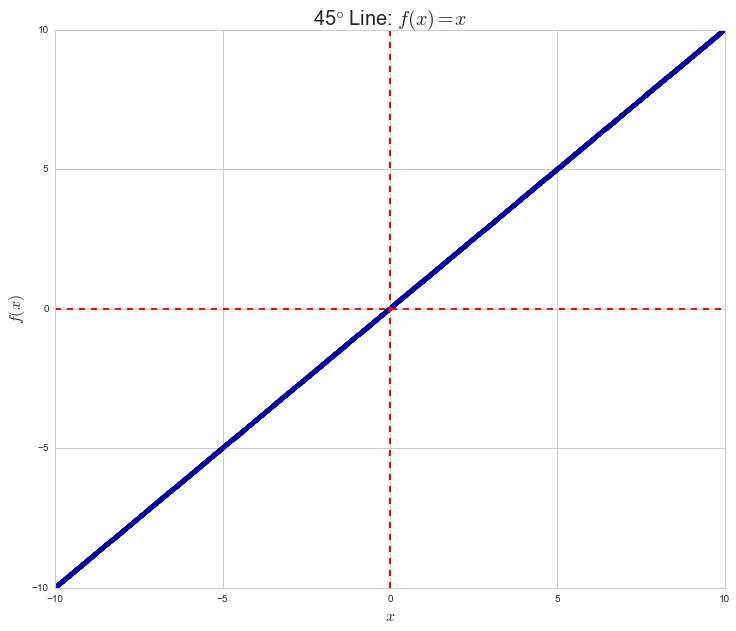

In [5]:
x = linspace(-10, 10, 1000)
y = x

plt.figure(figsize = (12, 10))
plt.scatter(x=x, y=y)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.title(r'45$\degree$ Line: $f(x)=x$', fontsize=20)
plt.xlabel(r'$x$', fontsize = 16)
plt.ylabel(r'$f(x)$', fontsize = 16)
plt.axvline(0, color='r', ls='--', lw=2.0)
plt.axhline(0, color='r', ls='--', lw=2.0)

2. $f(x)=x^2$

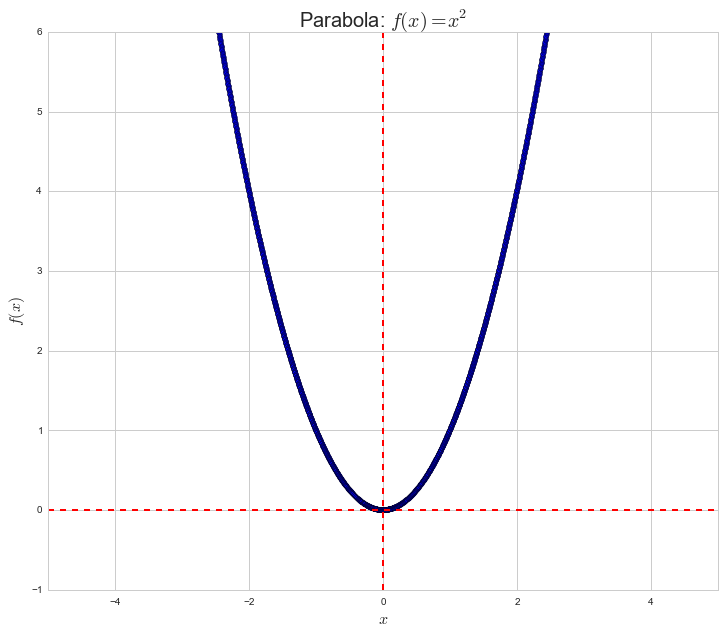

In [6]:
x = linspace(-10, 10, 10000)
y = x**2

plt.figure(figsize = (12, 10))
plt.scatter(x=x, y=y)
plt.xlim(-5, 5)
plt.ylim(-1, 6)
plt.title(r'Parabola: $f(x)=x^2$', fontsize=20)
plt.xlabel(r'$x$', fontsize = 16)
plt.ylabel(r'$f(x)$', fontsize = 16)
plt.axvline(0, color='r', ls='--', lw=2.0)
plt.axhline(0, color='r', ls='--', lw=2.0)

Now let's map from $\Re^2$:  

$f:\Re^2 \rightarrow \Re$

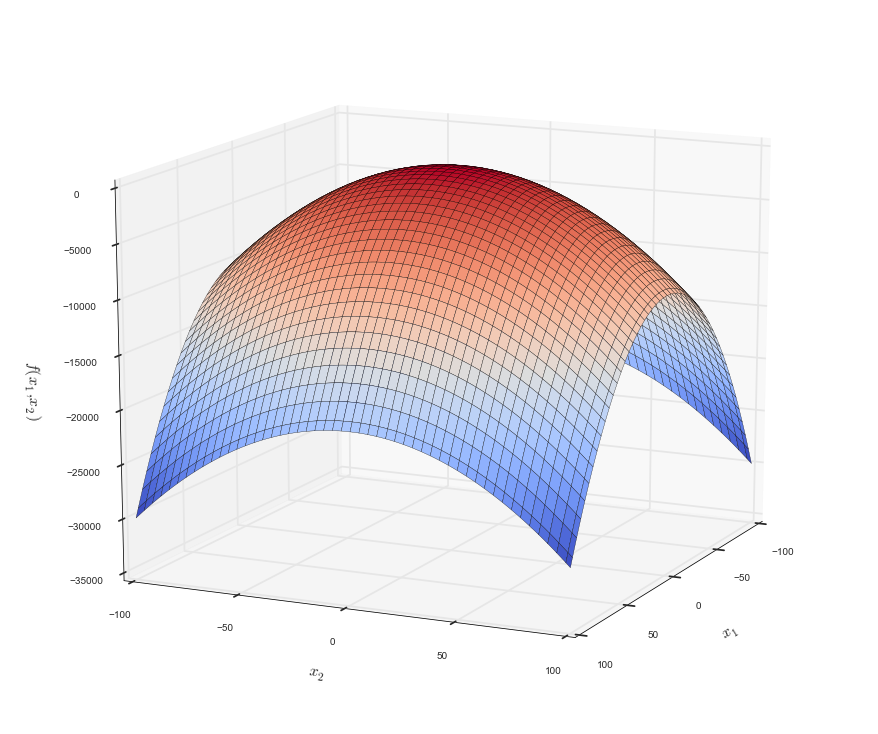

In [7]:
x1 = linspace(-100,100,100)
x2 = linspace(-100,100,100)
x1, x2 = meshgrid(x1, x2)
f = -2 * x1**2 - x2**2 + x1 + x2
        
fig = plt.figure(figsize = (12, 10))
ax = Axes3D(fig)
ax.plot_surface(x1, x2, f, rstride=2, cstride=2, cmap=cm.coolwarm, shade='interp')
ax.view_init(15,25)
ax.set_xlabel(r'$x_1$', fontsize = 16)
ax.set_ylabel(r'$x_2$', fontsize = 16)
ax.set_zlabel(r'$f(x_1, x_2)$', fontsize = 16)

## Differentiation

Let's start with a line with intecept $\beta_0$ and slope $\beta_1$ given by the equation: $y=\beta_0+\beta_1\cdot x$

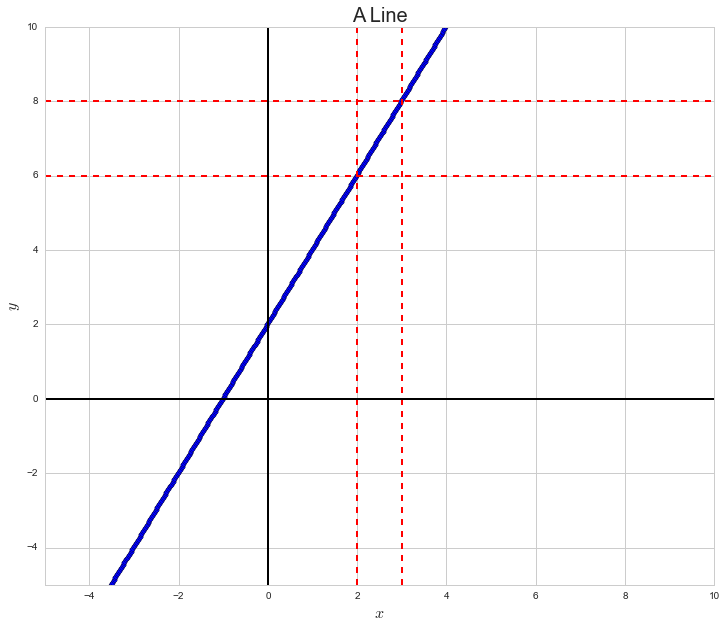

In [8]:
x = linspace(-10, 10, 1000)
y = 2 + 2 * x

plt.figure(figsize = (12, 10))
plt.scatter(x=x, y=y)
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.title(r'A Line', fontsize=20)
plt.xlabel(r'$x$', fontsize = 16)
plt.ylabel(r'$y$', fontsize = 16)

plt.axvline(0, color='black', lw=2.0)
plt.axvline(2, color='r', ls='--', lw=2.0)
plt.axvline(3, color='r', ls='--', lw=2.0)

plt.axhline(0, color='black', lw=2.0)
plt.axhline(6, color='r', ls='--', lw=2.0)
plt.axhline(8, color='r', ls='--', lw=2.0)

${\displaystyle \beta_1=\frac{\text{change in }y}{\text{change in }x}=\frac{\Delta y}{\Delta x}}$

If we examine the limit as $\Delta x \rightarrow 0$, we get the instantaneous rate of change.

Generally, if $f(x)$ is "nice", then ${\displaystyle \frac{d}{dx}f(x) \equiv \lim_{\Delta x \rightarrow 0} \frac{f(x+\Delta x)}{\Delta x}=f^\prime(x)}$

### General Rules of Differentiation

${\displaystyle \frac{d}{dx}} \left \{ \begin{array}{ll}
         {\displaystyle a = 0} \\
         {\displaystyle x^a = a x^{a-1}} \\
         {\displaystyle \exp(x) = \exp(x)} \\
         {\displaystyle \ln(x) = \frac{1}{x}} \\
         {\displaystyle \frac{d}{dx} = \frac{d^2}{dx^2} \text{     the second derivative}}
         \end{array} \right.$

Now let $f(x_1, x_2, ..., x_n): \Re^n \rightarrow \Re$.

${\displaystyle \frac{\partial f(x_1, x_2, ..., x_n)}{\partial x_1} \equiv \lim_{\Delta x_1 \rightarrow 0} 
\frac{f(x_1+\Delta x_1, x_2, ..., x_n)}{\Delta x_1}}$

In other words, we hold constant everything other than $x_1$, so we can "ignore" them when differentiating.

## Example 

$f(x_1,x_2)=-2x_1^2-x_2^2 + x_1 + x_2$

This function is graphed above.

${\displaystyle \begin{bmatrix}
\frac{\partial f(x_1, x_2)}{\partial x_1} \\
\frac{\partial f(x_1, x_2)}{\partial x_2} 
\end{bmatrix}=\begin{bmatrix}
f_1 \\
f_2  
\end{bmatrix}=\begin{bmatrix}
-4x_1+1 \\
-2x_2+1 
\end{bmatrix}}$

This is sometime called the gradient vector, $\nabla f$.

We can also formulate matrix of second partials, sometimes called the Hessian.

${\displaystyle \begin{bmatrix}
\frac{\partial^2 f(x_1, x_2)}{\partial x_1^2} & \frac{\partial^2 f(x_1, x_2)}{\partial x_1 \partial x_2}\\
\frac{\partial^2 f(x_1, x_2)}{\partial x_2 \partial x_1} & \frac{\partial^2 f(x_1, x_2)}{\partial x_2^2} 
\end{bmatrix}=\begin{bmatrix}
f_{11} & f_{12}\\
f_{21} & f_{22}  
\end{bmatrix}=\begin{bmatrix}
-4 & 0 \\
0 & -2 
\end{bmatrix}}$


Canonical set up of optimization:

$f: \Re^{N} \rightarrow \Re$

Goal is to find those points $x \in \Re^{N}$ at which $f(x)$ takes on a critical value.  Can write this as:

$\max_{x} f(x)$

The necessary First Order Conditions are:

${\displaystyle \frac{\partial f(x)}{\partial x_i} = 0}\forall i$ 

The sufficient Secord Order Conditions are:

${\displaystyle \frac{\partial^2 f(x)}{\partial x_i\partial x_j}}$
is $\left\{ \begin{array}{l l} 
{} & \quad \text{Negative definite if a maximum} \\ 
{} & \quad \text{Postive definite if a miminum} \\
{} & \quad \text{Indeterminate if neither} \\
\end{array} \right.$

In [5]:
from scipy.optimize import minimize

def func(params, sign=1.0):
    x1, x2 = params
    return sign*(-2 * x1**2 - x2**2 + x1 + x2)

minimize(func, [-10.0, -10.0], args=(-1.0,), method='BFGS', options={'disp': True})

Optimization terminated successfully.
         Current function value: -0.375000
         Iterations: 2
         Function evaluations: 20
         Gradient evaluations: 5


   status: 0
  success: True
     njev: 5
     nfev: 20
 hess_inv: array([[ 0.28571376, -0.13945372],
       [-0.13945372,  1.04453357]])
      fun: -0.37499999999999584
        x: array([ 0.25000003,  0.50000004])
  message: 'Optimization terminated successfully.'
      jac: array([  1.60187483e-07,   1.04308128e-07])

# Key Ideas from Probability Theory

## What is probability?  

The classical view of probability arose from gaming, such as gambling with fair dice.  It holds that outcomes have equal probabilty.  In other words, rolling a 1 on a die has a 1 in 6 chance.  Moreover, each trial is independent of prior trials or trials occurring simultaneously.  

The subjective view arose from the fact that we, as humans, must form expectations about the future in some manner.  How we do so may be subjective.  Therefore, this view of probability uses a model with randomness such as the payoff to an individual for a particular gamble.  

The frequentist view brought the formal tools of mathematics to the classical view, maintaining that probability can be measured as the history of outcomes from experimentation.  The experiment may be something simple, such as the flip of a coin, for which we consider the probability of getting heads.  

We will focus on the frequentist view.

## Components of an Experiment

### Sample space, $S$, which is the set of all possible outcomes.

Examples: 

1. Flipping a US penny, $S=\{Heads,Tails\}$

2. Throwing a die, $S=\{1,2,3,4,5,6\}$

3. Throwing two dice, $S=\{i,j\}: i,j=1,2,3,4,5,6$

### Events, $A$, which are any subset of $S$

Examples: 

1. $Heads$ from $\{Heads,Tails\}$

2. $2$ from $\{1,2,3,4,5,6\}$

3. $\{3,4\}$ from $\{i,j\}: i,j=1,2,3,4,5,6$

### Probability 

Probability is simple a mapping from events, $A$, to the unit interval.

$P: A\rightarrow[0,1]$, which we denote as $P(A)$

## Properites of Probability

1. The probability of an event occuring lies between 0 and 1: $P(A)\in[0,1]$

2. The probability of the sample space occurring is 1: $P(S)=1$

3. Summation: $P(A \cup B) = P(A) + P(B)$ for independent events

4. Conditioning: $P(A|B) = P(A)$ for independent events

5. Complimentary: $P(A^c) = 1-P(A)$

## Some Venn Diagrams on the Board 

Tim to the board.

Based on the Venn Diagrams, see if you can prove graphically that

1. $(A \cup B) \cup C = A \cup (B \cup C)$

2. $(A \cup B)^C = A^C \cup B^C$

# 6. Why This Matters